# Data Collection and Sampling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div style="widht:100%; height:20px; background-color:khaki;"></div>

## What is Statistical Inference?

**Statistical inference** is the process of *using data analysis to infer properties of an underlying population* based on a sample.

For example, the question, *"What percentage of voters approve of the way the U.S. President is handling their job?"* has been asked by U.S. polling companies since the 1930s. Determining the exact answer to this question would require conducting a **census**—collecting data from every single voter in the population. However, with over 250 million people of voting age in the U.S. (at that time), **conducting a census for this purpose would be a daunting and impractical task**.

Instead, polling companies use statistical inference to estimate the answer. By randomly sampling (say) 1,000 voters and determining the approval percentage among those voters, they use this percentage as an estimate for the approval percentage of the entire population of voters.

Before going further, let's recap the technical terms we mentioned in the last topic which will very important from now on:

- **Population**: The entire group of subjects about which we want information.
- **Parameter**: The quantity about the population we are interested in.
- **Sample**: The part of the population from which we collect information.
- **Statistic (estimate)**: The quantity we are interested in as measured in the sample.

So, from the previous example, the population is all the U.S. voters, the parameter is the approval percentage among all U.S. voters, the sample is the 1,000 voters selected at random, and the estimate is the approval percentage among the sampled voters.

The key point that makes this process work is that even a relatively small sample (like 100 or 1,000 out of millions) can (and will) produce an estimate that is close to the parameter. We will explore later why is this the case!

<div style="widht:100%; height:20px; background-color:khaki;"></div>

## Bias

The method used to sampling a population have to be planned correctly in order to get a reliable data.

For example, if you sample 1,000 voters from your hometown to answer the question of U.S. President approval percentage discussed earlier. It may be convenience but it is not a good sampling method because voters in your hometown may have different thought on the topic compare to voters in other areas.

A bad sampling will introduce **bias**, i.e. the sample will favor a certain outcome and become non-representative of the population. There are many types of bias, here are some important types:

- **Selection bias**: The *selection of specific* individuals, groups, or areas in such a way that proper randomization is not achieved.
- **Non-response bias** or **Participation bias**: Occurs when some selected *ample members are unable or unwilling to participate*, and these individuals may differ significantly from those who do participate, leading to the loss of certain perspectives.
- **Voluntary response bias**: Occurs when there sample is responding to the question without being randomly selected but the *sample chooses by themselves to partake in the survey*. This creates bias because people with strong opinions are most likely to respond.

<div style="widht:100%; height:20px; background-color:khaki;"></div>

## Random Sampling Methods

The simplest way to prevent bias is to sample using randomness in some planned way. The most well known way are **simple random sampling** and **stratified random sampling**

---
### Simple Random Sampling

A simple random sampling simply selects subjects at random without replacement. In this method, every subjects in the population are equally likely to be selected.

For example, the U.S. polling company may use the computer to dial telephone numbers at random to ask the question. This method will be very effective is every household have a landline (but you this is not the fact nowaday, every one used smartphone!).

---
### Stratified Random Sampling

Stratified random sampling is a more sophisticated way of sampling. It first divide the population into groups of similar subjects called ***strata*** (e.g. urban, suburban, state, age group, education level, ...) before randomly chooses a sample from each stratum and combines the result afterward.

While this method is more complicate to execute, but it can result in a more precise estimate than with the simple random sampling.

In [2]:
job_placement_all = pd.read_csv("dataset/job_placement.csv")
job_placement_all = job_placement_all[job_placement_all['placement_status'] == 'Placed']

job_placement_sample_100 = job_placement_all.sample(n=100, random_state=32).reset_index()
job_placement_by_stream = [df.reset_index() for _,df in job_placement_all.groupby('stream')]
job_placement_by_stream_sample_100 = pd.concat([
    df.sample(n = int(100/len(job_placement_by_stream)), random_state=32).reset_index(drop=True)
    for df in job_placement_by_stream
]).reset_index(drop=True)

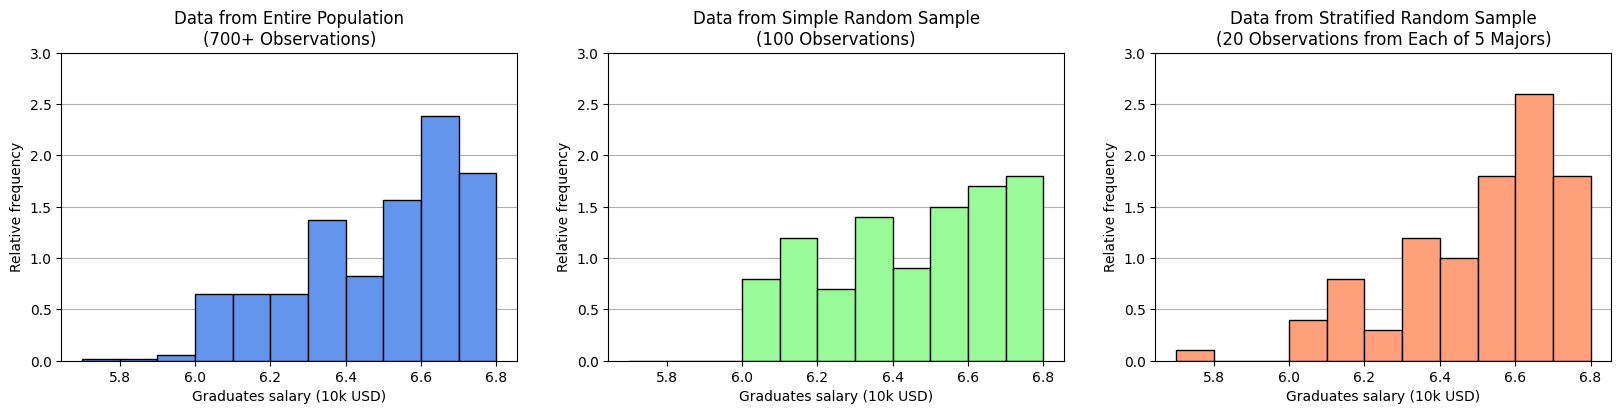

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(20,4))

min_salary = job_placement_all['salary'].min() / 10000;
max_salary = job_placement_all['salary'].max() / 10000;

axs[0].hist(
    job_placement_all['salary'] / 10000, 
    bins = np.linspace(min_salary, max_salary, 12),
    color='cornflowerblue', edgecolor='black',
    density=True
);

axs[1].hist(
    job_placement_sample_100['salary'] / 10000, 
    bins = np.linspace(min_salary, max_salary, 12),
    color='palegreen', edgecolor='black',
    density=True
);

axs[2].hist(
    job_placement_by_stream_sample_100['salary'] / 10000, 
    bins = np.linspace(min_salary, max_salary, 12),
    color='lightsalmon', edgecolor='black',
    density=True
);

for ax in axs:
    ax.set_axisbelow(True); ax.grid(True, axis='y')
    ax.set_yticks(np.arange(0.0, 3.1, 0.5))
    ax.set_xlabel("Graduates salary (10k USD)");
    ax.set_ylabel("Relative frequency");

axs[0].set_title("Data from Entire Population\n(700+ Observations)");
axs[1].set_title("Data from Simple Random Sample\n(100 Observations)");
axs[2].set_title("Data from Stratified Random Sample\n(20 Observations from Each of 5 Majors)");

<div style="widht:100%; height:20px; background-color:khaki;"></div>

## Chance Error

Since the sample is drawn at random, it is always possible that some infomation of the population are lose, making the estimation deviate from the parameter. This error due to randomness of the sample if called **chance error** or **sample error**.

The estimate will be different from the parameter due to both bias (systematic error) and chance error (sample error). So we should take both of them into consideration when making an estimation.

$$
\text{estimate} \;=\; \text{parameter} \;+\; \text{bias} \;+\; \text{chance error}
$$

Chance error is unavoidable; if randomness is involved, there will surely be an error. Drawing another sample will result in a different chance error and it will get smaller as the sample size gets bigger. Moreover, we can compute how large the chance error will be.

This is not the case for the bias: Increasing the sample size just repeats the error on a larger scale, and typically we don’t know how large the bias is. Thus, having the bias is more of a problem, that is why we use chance in sampling in order to avoid bias.

<div style="widht:100%; height:20px; background-color:khaki;"></div>

## Observation and Experiment

---
### Observational Studies

An observational study draws inferences from a sample to a population where the independent variable is not under the control of the researcher (because of ethical concerns or logistical constraints). One common observational study is about the possible effect of a treatment on subjects.

For example, consider the statement *"People who eat red meat have higher rates of certain cancers than people who don’t eat red meat"*, the statistical term for this would be *"there is an **association** between red meat consumption and cancer"*. However, even if this association is observed to be true, it does not mean that eating red meat causes cancer. Other factors might be at play—for instance, people who don’t eat red meat might tends to exercise more and drink less alcohol, and these factors could be the actual causes of the difference in cancer rates. This is an observatinal study, its measures outcomes interest, in this case, the cancer rate among people who eat red meat and the cancer rate among people who do not eat red meat, and use it to establish association between them.

The example above aligns with a famous phrase in statistics and analysis: 
> ***"Correlation does not imply causation."*** 

Despite observing that two factors are associated, it does not mean that one causes the other. There may be other factors driving the observed relationship; these are known as **confounding factors** (or lurking variables). **To establish causation, an experiment is required**.

---
### Experimental Studies

As covered in the previous section, observational is where you observe certain variables and try to determine if there is any *correlation*. The next step is **experimental** where you control certain variables and try to determine if there is any *causality*.

In an (comparative) experiment, the sample is divided into two groups; treatment group and control group.

A **treatment** (e.g. eating red meat, taking medication) is assigned to people in **treatment group**, that is we applied hypotheses to subjects in this group but *not* to subjects in **control group**. We then observe the two groups and compare the outcomes for causality.

To rule out confounding factors, **both groups should be similar**, apart from the treatment. The simplest and effective we to make sure that the two groups are similar is to assign subjects into the two groups at random. Despite the possibility that a confounder may be more prevalent in one group, this is considered a chance error. Such an error can be calculated and accounted for when comparing the outcomes.

In some experiment, members of a control group recieve a **placebo**, which is a substance or treatment which is designed to have be neutral (have no effect) but resembles the treatment. For example, suppose we run an experiment to test a new medication, then the treatment for the treatment group might consist of a pill, and the placebo for the control group would also be a pill but will no medication in it. Assigning a placebo to the control group makes sure that both groups are **equally affected by the *placebo effect***: the idea of being treated may have an effect by itself.

The experiment should also be **double-blinded**, that is neither the subjects nor the evaluators know which subjects are assigned to the treatment and the control to avoid biases.

<div style="widht:100%; height:20px; background-color:khaki;"></div>